In [1]:
import pandas as pd
import sklearn.metrics as metrique
from pandas import Series
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten
from tensorflow.keras.layers import RepeatVector, Dense, Activation, Lambda
from tensorflow.keras import backend as K, regularizers, Model, metrics
from tensorflow.keras.backend import cast

In [2]:
x_train = pd.read_csv('324 X_resampled  + Gan + EllipticEnvelope.csv', na_filter=True)
y_train = pd.read_csv('324 y_resampled  + Gan + EllipticEnvelope.csv', na_filter=True)
x_test = pd.read_csv('324 test  X_resampled  + Gan + EllipticEnvelope.csv', na_filter=True)
y_test = pd.read_csv('324 test  y_resampled  + Gan + EllipticEnvelope.csv', na_filter=True)


In [ ]:
result = pd.concat([X_train, y_train], axis=1)
result.drop_duplicates(inplace=True)
y_train=result['Class']
result.drop(['Class'],inplace=True,axis=1)
X_train=result
y_train.shape,X_train.shape

In [3]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(x_train)
X_test = StandardScaler().fit_transform(x_test)

In [4]:
X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size=0.1)

In [5]:
X_train.shape

(223909, 18)

In [6]:
X_test.shape

(85428, 18)

In [7]:
X_val.shape

(24879, 18)

In [8]:
# X_train et X_val sont des dataframe qui contient les features
train_GRU_X=X_train
val_GRU_X=X_val
test_GRU_X=X_test

## Reshape input to be 3D [samples, timesteps, features] (format requis par GRU)
train_GRU_X = train_GRU_X.reshape((train_GRU_X.shape[0], 1, train_GRU_X.shape[1]))
val_GRU_X = val_GRU_X.reshape((val_GRU_X.shape[0], 1, val_GRU_X.shape[1]))
test_GRU_X = test_GRU_X.reshape((test_GRU_X.shape[0], 1, test_GRU_X.shape[1]))

## Recuperation des labels
train_GRU_y=y_train
val_GRU_y=y_val
test_GRU_y=y_test

In [9]:
model = Sequential()
#model.add(GRU(50,dropout=0.3,recurrent_dropout=0.2, return_sequences=True))
model.add(GRU(50,dropout=0.3,recurrent_dropout=0.2, return_sequences=True))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history=model.fit(train_GRU_X, train_GRU_y,epochs=100,batch_size=2000, validation_data=(val_GRU_X, val_GRU_y))

Epoch 1/100
112/112 [==============================] - 4s 14ms/step - loss: 0.3449 - accuracy: 0.8961 - val_loss: 0.1027 - val_accuracy: 0.9935
Epoch 2/100
112/112 [==============================] - 1s 11ms/step - loss: 0.0778 - accuracy: 0.9885 - val_loss: 0.0237 - val_accuracy: 0.9993
Epoch 3/100
112/112 [==============================] - 1s 11ms/step - loss: 0.0307 - accuracy: 0.9965 - val_loss: 0.0102 - val_accuracy: 0.9994
Epoch 4/100
112/112 [==============================] - 1s 12ms/step - loss: 0.0175 - accuracy: 0.9981 - val_loss: 0.0065 - val_accuracy: 0.9994
Epoch 5/100
112/112 [==============================] - 1s 13ms/step - loss: 0.0123 - accuracy: 0.9985 - val_loss: 0.0051 - val_accuracy: 0.9994
Epoch 6/100
112/112 [==============================] - 1s 13ms/step - loss: 0.0096 - accuracy: 0.9987 - val_loss: 0.0044 - val_accuracy: 0.9994
Epoch 7/100
112/112 [==============================] - 1s 13ms/step - loss: 0.0080 - accuracy: 0.9988 - val_loss: 0.0041 - val_accuracy:

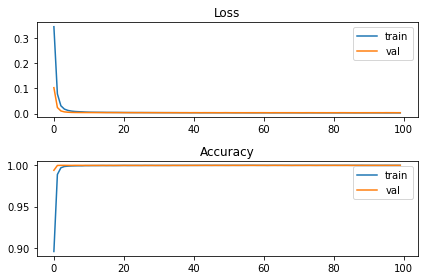

In [12]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.tight_layout()
pyplot.show()

In [13]:
# predict probabilities for test set
yhat_probs = model.predict(test_GRU_X, verbose=0)> 0.5
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

In [14]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_GRU_y, yhat_probs)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_GRU_y, yhat_probs)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_GRU_y, yhat_probs)
print('Recall: %f' % recall)
#F1 = 2 * (precision * recall) / (precision + recall)
f1=f1_score(test_GRU_y, yhat_probs)
print('f1: %f' % f1)

print(classification_report(test_GRU_y, yhat_probs))

Accuracy: 0.999532
Precision: 0.880597
Recall: 0.830986
Recall: 0.855072
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85286
           1       0.88      0.83      0.86       142

    accuracy                           1.00     85428
   macro avg       0.94      0.92      0.93     85428
weighted avg       1.00      1.00      1.00     85428



In [15]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [16]:
cm = confusion_matrix(y_true=test_GRU_y, y_pred=yhat_probs)

In [17]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
labels = ['Normal','Fraud']

Confusion matrix, without normalization
[[85270    16]
 [   24   118]]


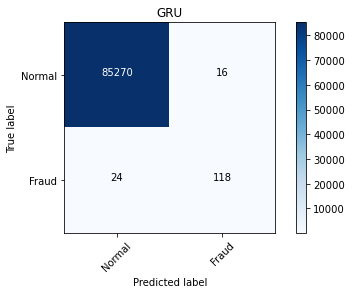

In [18]:
plot_confusion_matrix(cm=cm, classes=labels, title='GRU')

In [19]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [20]:
# inputs1=Input((1,18))
# att_in=GRU(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(inputs1)
# att_in_1=GRU(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
# att_out=attention()(att_in_1)
# outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
# model1=Model(inputs1,outputs1)

In [21]:
inputs1=Input((1,18))
att_in=GRU(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(inputs1)
#att_in_1=GRU(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
att_out=attention()(att_in)
outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
model1=Model(inputs1,outputs1)

In [22]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history1=model1.fit(train_GRU_X, train_GRU_y,epochs=100,batch_size=3000, validation_data=(val_GRU_X, val_GRU_y))

Epoch 1/100
75/75 [==============================] - 4s 22ms/step - loss: 0.3875 - accuracy: 0.9055 - val_loss: 0.1619 - val_accuracy: 0.9879
Epoch 2/100
75/75 [==============================] - 1s 18ms/step - loss: 0.1251 - accuracy: 0.9799 - val_loss: 0.0502 - val_accuracy: 0.9965
Epoch 3/100
75/75 [==============================] - 1s 18ms/step - loss: 0.0562 - accuracy: 0.9923 - val_loss: 0.0212 - val_accuracy: 0.9992
Epoch 4/100
75/75 [==============================] - 1s 18ms/step - loss: 0.0317 - accuracy: 0.9963 - val_loss: 0.0119 - val_accuracy: 0.9994
Epoch 5/100
75/75 [==============================] - 1s 18ms/step - loss: 0.0212 - accuracy: 0.9977 - val_loss: 0.0082 - val_accuracy: 0.9994
Epoch 6/100
75/75 [==============================] - 1s 18ms/step - loss: 0.0156 - accuracy: 0.9982 - val_loss: 0.0064 - val_accuracy: 0.9994
Epoch 7/100
75/75 [==============================] - 1s 18ms/step - loss: 0.0127 - accuracy: 0.9985 - val_loss: 0.0055 - val_accuracy: 0.9994
Epoch 

In [24]:
# predict probabilities for test set
yhat_probs1 = model1.predict(test_GRU_X, verbose=0)> 0.5
# reduce to 1d array
yhat_probs1 = yhat_probs1[:, 0]

In [25]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_GRU_y, yhat_probs1)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_GRU_y, yhat_probs1)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_GRU_y, yhat_probs1)
print('Recall: %f' % recall)
#F1 = 2 * (precision * recall) / (precision + recall)
f1=f1_score(test_GRU_y, yhat_probs1)
print('f1: %f' % f1)

print(classification_report(test_GRU_y, yhat_probs1))

Accuracy: 0.999508
Precision: 0.857143
Recall: 0.845070
Recall: 0.851064
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85286
           1       0.86      0.85      0.85       142

    accuracy                           1.00     85428
   macro avg       0.93      0.92      0.93     85428
weighted avg       1.00      1.00      1.00     85428



In [26]:
cm1 = confusion_matrix(y_true=test_GRU_y, y_pred=yhat_probs1)

Confusion matrix, without normalization
[[85266    20]
 [   22   120]]


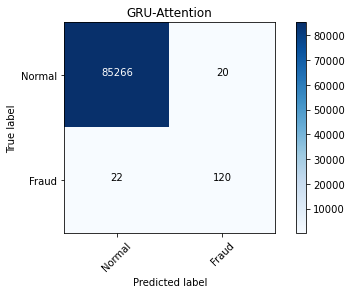

In [27]:
plot_confusion_matrix(cm=cm1, classes=labels, title='GRU-Attention', normalize=False)